# __Teaching Unit: Programming fundamentals for health data__
Oskar LAVERNY
## __Practical Work 2 - Introduction to pandas__

### Learning objectives:


1.   Creation of dataFrame
2.   Manipulation of a dataFrame
3.   Transformation of the values



### __DataFrame__


To create a DataFrame, you have to first import the `pandas` library. Then use the constructor `DataFrame()`. In Python, if you want to use some function from an imported library, you have to use the appropriate prefix. By default, the prefix will be the name of the library.

In [ ]:
import pandas

df = pandas.DataFrame(data = [[2, 3], [5, 8], [9, 10]], index = ["row1", "row2", "row3"], columns = ['col1', 'col2'])
print(df)

      col1  col2
row1     2     3
row2     5     8
row3     9    10


But you can also use alias, when importing the library you specify an alias that will be use instead of the library's name.

In [ ]:
import pandas as pd

df = pd.DataFrame(data = [[2, 3], [5, 8], [9, 10]], index = ['row1', 'row2', 'row3'], columns = ['col1', 'col2'])
print(df)

      col1  col2
row1     2     3
row2     5     8
row3     9    10


If you don't want to use any prefix, you can also import library with the `*` character. This way you won't have to use any prefix, __BUT__ if you import two libraries with two functions which has the same name you could have some surprises so be carefull.

In [ ]:
from pandas import *

df = DataFrame(data = [[2, 3], [5, 8], [9, 10]], index = ['row1', 'row2', 'row3'], columns = ['col1', 'col2'])
print(df)

      col1  col2
row1     2     3
row2     5     8
row3     9    10


You can find the Python documentation for DataFrame [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

### __Exercise 1 - Creation of a DataFrame from a dictionary__

#### __Build a DataFrame from the following dictionary__



1.   Build a DataFrame with the dictionary.
2.   Display the 5 first rows of the DataFrame with 2 different ways.
3.   Use the column `Names` as indexes of the DataFrame.
4.    Display the row associated with Pierre.
5.    Add the following observation to the DataFrame: `{Names: 'Nicolas', Measures: 12.3, Center: '1'}`
6.    Give the overall mean measurement.
7.    Give the mean measurement of each center.
8.    Add the following observations from a third center to the DataFrame: `{'Names': ['Marius', 'Robert', 'Karim'], 'Measures': [15.3, 3.1, 1.5]}`.

```
dict1 = {
  'Names': ['Jean', 'Marie', 'Joseph', 'Marthe', 'Jacob', 'Marc', 'Paul', 'Pierre', 'Ismael', 'David', 'Mathieu'],
  'Measures': [12.5, 18.0, 10.0, 13.2, 3.2, 5.7, 12.0, 6.0, 7.0, 14.5, 17.6],
  'Center': ['1', '2', '2', '1', '2', '2', '1', '2', '1', '2', '2']
}
```



#### __Correction of exercise 1__

1. Build a DataFrame with the dictionary

In [ ]:
import pandas as pd

dict1 = {
    'Names': ['Jean', 'Marie', 'Joseph', 'Marthe', 'Jacob', 'Marc', 'Paul', 'Pierre', 'Ismael', 'David', 'Mathieu'],
    'Measures': [12.5, 18.0, 10.0, 13.2, 3.2, 5.7, 12.0, 6.0, 7.0, 14.5, 17.6],
    'Center': ['1', '2', '2', '1', '2', '2', '1', '2', '1', '2', '2']
}

df = pd.DataFrame(dict1)
print(df)

      Names  Measures Center
0      Jean      12.5      1
1     Marie      18.0      2
2    Joseph      10.0      2
3    Marthe      13.2      1
4     Jacob       3.2      2
5      Marc       5.7      2
6      Paul      12.0      1
7    Pierre       6.0      2
8    Ismael       7.0      1
9     David      14.5      2
10  Mathieu      17.6      2


2. Display the first 5 rows of the DataFrame

In [ ]:
# First way
df.iloc[0:5]

# Second way
df.head(5)

,Names,Measures,Center
0,Jean,12.5,1
1,Marie,18.0,2
2,Joseph,10.0,2
3,Marthe,13.2,1
4,Jacob,3.2,2


3.   Use the column `Names` as indexes of the DataFrames.


In [ ]:
# 3. We will use the names as an index
df.set_index("Names")
df.index

RangeIndex(start=0, stop=11, step=1)

In [ ]:
print(df)

      Names  Measures Center
0      Jean      12.5      1
1     Marie      18.0      2
2    Joseph      10.0      2
3    Marthe      13.2      1
4     Jacob       3.2      2
5      Marc       5.7      2
6      Paul      12.0      1
7    Pierre       6.0      2
8    Ismael       7.0      1
9     David      14.5      2
10  Mathieu      17.6      2


We can see that the index has not been saved. We will have to use another statement.

In [ ]:
# df = df.set_index('Names')
df.set_index('Names', inplace = True)
print(df)

         Measures Center
Names                   
Jean         12.5      1
Marie        18.0      2
Joseph       10.0      2
Marthe       13.2      1
Jacob         3.2      2
Marc          5.7      2
Paul         12.0      1
Pierre        6.0      2
Ismael        7.0      1
David        14.5      2
Mathieu      17.6      2


4.   Display the row associated with Pierre.


In [ ]:
# First way to do it (equivalent to what we would do with R)
df[df.index == 'Pierre']

,Measures,Center
Names,,
Pierre,6.0,2


In [ ]:
# A second way, use the mechanisms of the index
df.loc['Pierre']

Measures    6.0
Center        2
Name: Pierre, dtype: object

In [ ]:
# It doesn't work with .iloc since it's not an integer
df.iloc['Pierre']

TypeError: ignored

5.   Add the following observation to the DataFrame:  
`{Names: Nicolas, Measures: 12.3, Center: '1'}`.

In [ ]:
new_df = pd.DataFrame({'Measures':12.3, 'Center':'1'}, index = ['Nicolas'])
new_df

,Measures,Center
Nicolas,12.3,1


In [ ]:
df = df.append(new_df)
print(df)

         Measures Center
Jean         12.5      1
Marie        18.0      2
Joseph       10.0      2
Marthe       13.2      1
Jacob         3.2      2
Marc          5.7      2
Paul         12.0      1
Pierre        6.0      2
Ismael        7.0      1
David        14.5      2
Mathieu      17.6      2
Nicolas      12.3      1


<ipython-input-18-aacfe8e25b50>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


6.   Give the overall mean measurement.


In [ ]:
# Print the overall mean
print('The overall mean is %2.f' % (sum(df['Measures'])/df.shape[0]))

The overall mean is 11


In [ ]:
# There is a mean method with pandas
print('The overall mean is %2.f' % df['Measures'].mean())

The overall mean is 11


In [ ]:
# You can also use the name of the column as if it was an attribute
df.Measures

Jean       12.5
Marie      18.0
Joseph     10.0
Marthe     13.2
Jacob       3.2
Marc        5.7
Paul       12.0
Pierre      6.0
Ismael      7.0
David      14.5
Mathieu    17.6
Nicolas    12.3
Name: Measures, dtype: float64

In [ ]:
# Then with a single ligne
print('The overall mean is %2.f' % df.Measures.mean())

The overall mean is 11


7.   Give the mean measurement of each center.


In [ ]:
# First way
[df.Measures[df['Center'] == i].mean() for i in df.Center.unique()]

[11.4, 10.714285714285714]

In [ ]:
# Second way with a for loop
for i in df.Center.unique():
  mean_value = df.Measures[df['Center']==i].mean()
  print(f'The mean value of center {i} is {mean_value}')

The mean value of center 1 is 11.4
The mean value of center 2 is 10.714285714285714


In [ ]:
# A third way with the groupby method
?pd.DataFrame.groupby

In [ ]:
df.groupby('Center').mean()

,Measures
Center,
1,11.400000
2,10.714286


8.   Add the following observations from a third center to the DataFrame.
`'Names': ['Marius', 'Robert', 'Karim'], 'Measures': [15.3, 3.1, 1.5]`

In [ ]:
new_df = pd.DataFrame({'Measures': [15.3, 3.1, 1.5],
                       'Center': ['3', '3', '3'],
                      },
                      index = ['Marius', 'Robert', 'Karim'])

df = df.append(new_df)
print(df)

         Measures Center
Jean         12.5      1
Marie        18.0      2
Joseph       10.0      2
Marthe       13.2      1
Jacob         3.2      2
Marc          5.7      2
Paul         12.0      1
Pierre        6.0      2
Ismael        7.0      1
David        14.5      2
Mathieu      17.6      2
Nicolas      12.3      1
Marius       15.3      3
Robert        3.1      3
Karim         1.5      3


<ipython-input-53-62bf6761c738>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_df)


### __Exercise 2 - DataFrame Manipulation__

##### __DataFrame.loc | Select column & Row by name__
Access specific row/column with the name (label) of the row/column.

##### __DataFrame.iloc | Select column indexes & row indexes positions__
Access specific row/column with an index

From the following DataFrame


1.   Display the first and last 3 rows
2.   Display the column age
3.   Display the number of rows
4.   Display the proportion of male and female patients
5.   Display the `id` of the youngest and oldest patient along with the corresponding ages.
6.   Display all the patients that are over 40 years old.
7.   Compute the BMI of each patients and add a new column with this value in your DataFrame.
8.   Create a new column with the categorized version of BMI
9.   Display the number of patients in each BMI category.
10.  Give the mean age of each category.



In [1]:
import pandas as pd

df = pd.DataFrame({
    'id': ['085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '95'],
    'age': [19, 42, 25, 58, 36, 74, 65, 20, 47, 32, 23],
    'weight': ['50', '46', '60', '103', '75', '68', '82', '96', '74', '113', '180'],
    'height': [158, 174, 195, 169, 158, 201, 189, 163, 184, 173, 171],
    'sex': ['F', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F']
})

__Note 1:__ The Body Mass Index (BMI) can be calculated with the formula:

$$
BMI = \frac{Weight}{Height^2}
$$
with the height in meters and the weight in kg.

__Note 2:__ We usually categroized the BMI with the following categories:

| Category || BMI (kg/m^2)|
|---------||:------------|
| Underweight | Less than 16.0 |
| Thinness | Between 16.0 and 18.4 |
| Normal range | Between 18.5 and 24.9 |
| Overweight | Between 25.0 and 29.9 |
| Obese (Class I) | Between 30.0 and 34.9 |
| Obese (Class II) | Between 35.0 and 39.9 |
| Obese (Class III) | More than 40.0 |

#### 1. Display the first and last 3 rows.

In [2]:
# We can use the head method or iloc
df.head(3)


,id,age,weight,height,sex
0,085,19,50,158,F
1,086,42,46,174,F
2,087,25,60,195,F


In [3]:
df.iloc[:3]

,id,age,weight,height,sex
0,085,19,50,158,F
1,086,42,46,174,F
2,087,25,60,195,F


In [4]:
df[:3]

,id,age,weight,height,sex
0,085,19,50,158,F
1,086,42,46,174,F
2,087,25,60,195,F


#### 2. Display the column age

In [5]:
# First way
df.age

0     19
1     42
2     25
3     58
4     36
5     74
6     65
7     20
8     47
9     32
10    23
Name: age, dtype: int64

In [6]:
# Second way
df['age']

0     19
1     42
2     25
3     58
4     36
5     74
6     65
7     20
8     47
9     32
10    23
Name: age, dtype: int64

In [7]:
# Third way
df.loc[:,'age']

0     19
1     42
2     25
3     58
4     36
5     74
6     65
7     20
8     47
9     32
10    23
Name: age, dtype: int64

In [8]:
# Fourth way
df.iloc[:,1]

0     19
1     42
2     25
3     58
4     36
5     74
6     65
7     20
8     47
9     32
10    23
Name: age, dtype: int64

#### 3. Display the number of rows

In [9]:
# First way
len(df)

11

In [10]:
# Second way
df.shape[0]

11

#### 4. Display the proportion of male and female patients.


In [11]:
(df.groupby('sex').size()/df.shape[0])*100

sex
F    63.636364
M    36.363636
dtype: float64

#### 5. Display the 'id' of the youngest and oldest patient along with the corresponding ages.

In [12]:
# Take a look at the idxmin method
help(pd.DataFrame.idxmin)

Help on function idxmin in module pandas.core.frame:

idxmin(self, axis: 'Axis' = 0, skipna: 'bool' = True, numeric_only: 'bool' = False) -> 'Series'
    Return index of first occurrence of minimum over requested axis.
    
    NA/null values are excluded.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        The axis to use. 0 or 'index' for row-wise, 1 or 'columns' for column-wise.
    skipna : bool, default True
        Exclude NA/null values. If an entire row/column is NA, the result
        will be NA.
    numeric_only : bool, default False
        Include only `float`, `int` or `boolean` data.
    
        .. versionadded:: 1.5.0
    
    Returns
    -------
    Series
        Indexes of minima along the specified axis.
    
    Raises
    ------
    ValueError
        * If the row/column is empty
    
    See Also
    --------
    Series.idxmin : Return index of the minimum element.
    
    Notes
    -----
    This method is the DataFra

In [13]:
# idxmin method will return the index of the minimum value of the dataframe
df['age'].idxmin()

0

In [14]:
# To automatically print it, we will simultaneously use the iloc method
df.iloc[df['age'].idxmin(),]

id        085
age        19
weight     50
height    158
sex         F
Name: 0, dtype: object

In [20]:
# To return the id
print(f'id:{df.iloc[df["age"].idxmin(), 0]} is the youngest patient with {min(df["age"])} years old')
print(f"id:{df.iloc[df['age'].idxmax(), 0]} is the oldest patient with {max(df['age'])} years old")

id:085 is the youngest patient with 19 years old
id:090 is the oldest patient with 74 years old


#### 6. Display all the patients that are over 40 years old.

In [21]:
# We can do it with a for loop
patients_over_40 = list()
n = df.shape[0]

for i in range(0, n):
  if df.age[i] > 40:
    patients_over_40.append(i)
  else:
    next

print(patients_over_40)
print(df.loc[patients_over_40])

[1, 3, 5, 6, 8]
    id  age weight  height sex
1  086   42     46     174   F
3  088   58    103     169   M
5  090   74     68     201   F
6  091   65     82     189   M
8  093   47     74     184   F


In [24]:
# Another way to do it
df['age']>40
type(df['age']> 40)

pandas.core.series.Series

In [25]:
# You can use it in a DataFrame
patients_over_40 = df['age']>40
df[patients_over_40]

,id,age,weight,height,sex
1,086,42,46,174,F
3,088,58,103,169,M
5,090,74,68,201,F
6,091,65,82,189,M
8,093,47,74,184,F


In [26]:
# In a single line
df[df['age']>40]

,id,age,weight,height,sex
1,086,42,46,174,F
3,088,58,103,169,M
5,090,74,68,201,F
6,091,65,82,189,M
8,093,47,74,184,F


In [27]:
# Or with a query method
df.query('age > 40')

,id,age,weight,height,sex
1,086,42,46,174,F
3,088,58,103,169,M
5,090,74,68,201,F
6,091,65,82,189,M
8,093,47,74,184,F


#### 7. Compute the BMI of each patient and add a column with this value in your DataFrame

In [28]:
# We can compute the BMI with a for loop
BMI = list()

for i in range(0, df.shape[0]):
  height_in_meters = df.height[i]/100
  weight_as_int = df.weight.astype('int')[i]
  BMI.append((weight_as_int/(height_in_meters**2)).astype('int'))

BMI
# df['BMI'] = BMI

[20, 15, 15, 36, 30, 16, 22, 36, 21, 37, 61]

In [31]:
# Another way to do it
# Create a pd.Series with the values
BMI = pd.Series((df.weight.astype(int)/(df.height/100)**2)).astype(float)
new_df = df.assign(BMI = BMI)

In [32]:
new_df

,id,age,weight,height,sex,BMI
0,085,19,50,158,F,20.028842
1,086,42,46,174,F,15.193553
2,087,25,60,195,F,15.779093
3,088,58,103,169,M,36.063163
4,089,36,75,158,M,30.043262
5,090,74,68,201,F,16.831267
6,091,65,82,189,M,22.955684
7,092,20,96,163,F,36.132335
8,093,47,74,184,F,21.857278
9,094,32,113,173,M,37.756023


In [36]:
# Another way
df['BMI'] = pd.Series((df.weight.astype(int)/(df.height/100)**2)).astype(float)

#### 8. Create a new column with the categorized version of BMI

In [37]:
# For this question we will use the pandas fonction called 'cut()'
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: 'bool' = True, labels=None, retbins: 'bool' = False, precision: 'int' = 3, include_lowest: 'bool' = False, duplicates: 'str' = 'raise', ordered: 'bool' = True)
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values 

In [38]:
# Problem is, with values over 40 we have a NaN so we need to add the infinite value as a limit
pd.cut(df.BMI, bins = [0, 16.5, 18.5, 25.0, 30.0, 35.0, 40.0], right = False)

0     [18.5, 25.0)
1      [0.0, 16.5)
2      [0.0, 16.5)
3     [35.0, 40.0)
4     [30.0, 35.0)
5     [16.5, 18.5)
6     [18.5, 25.0)
7     [35.0, 40.0)
8     [18.5, 25.0)
9     [35.0, 40.0)
10             NaN
Name: BMI, dtype: category
Categories (6, interval[float64, left]): [[0.0, 16.5) < [16.5, 18.5) < [18.5, 25.0) < [25.0, 30.0) <
                                          [30.0, 35.0) < [35.0, 40.0)]

In [39]:
import numpy as np
pd.cut(df.BMI, bins = [0, 16.5, 18.5, 25.0, 30.0, 35.0, 40.0, np.inf])
# You can also use a label for the category

0     (18.5, 25.0]
1      (0.0, 16.5]
2      (0.0, 16.5]
3     (35.0, 40.0]
4     (30.0, 35.0]
5     (16.5, 18.5]
6     (18.5, 25.0]
7     (35.0, 40.0]
8     (18.5, 25.0]
9     (35.0, 40.0]
10     (40.0, inf]
Name: BMI, dtype: category
Categories (7, interval[float64, right]): [(0.0, 16.5] < (16.5, 18.5] < (18.5, 25.0] <
                                           (25.0, 30.0] < (30.0, 35.0] < (35.0, 40.0] <
                                           (40.0, inf]]

In [40]:
pd.cut(df.BMI, bins = [0, 16.5, 18.5, 25.0, 30.0, 35.0, 40.0, np.inf],
       labels = ['Underweight', 'Thinness', 'Normal range', 'Overweight', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)'])

0          Normal range
1           Underweight
2           Underweight
3      Obese (Class II)
4       Obese (Class I)
5              Thinness
6          Normal range
7      Obese (Class II)
8          Normal range
9      Obese (Class II)
10    Obese (Class III)
Name: BMI, dtype: category
Categories (7, object): ['Underweight' < 'Thinness' < 'Normal range' < 'Overweight' < 'Obese (Class I)' <
                         'Obese (Class II)' < 'Obese (Class III)']

In [42]:
df['BMI_cat'] = pd.cut(df.BMI, bins = [0, 16.5, 18.5, 25.0, 30.0, 35.0, 40.0, np.inf],
       labels = ['Underweight', 'Thinness', 'Normal range', 'Overweight', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)'])

In [43]:
df

,id,age,weight,height,sex,BMI,BMI_cat
0,085,19,50,158,F,20.028842,Normal range
1,086,42,46,174,F,15.193553,Underweight
2,087,25,60,195,F,15.779093,Underweight
3,088,58,103,169,M,36.063163,Obese (Class II)
4,089,36,75,158,M,30.043262,Obese (Class I)
5,090,74,68,201,F,16.831267,Thinness
6,091,65,82,189,M,22.955684,Normal range
7,092,20,96,163,F,36.132335,Obese (Class II)
8,093,47,74,184,F,21.857278,Normal range
9,094,32,113,173,M,37.756023,Obese (Class II)


### __Exerrcise 3 - Date format__

For this exercise, we will be using the [HortonGeneralHospital.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00549/HortonGeneralHospital.csv), a dataset provided on the *UCI Machine Learning Repository*.

In this dataset, we have monthly numbers of transfers from Emergency Room into Critical Care classified in three exclusive categories at Horton General Hospital (Banbury, UK) from November 1999 to May 2011. The three categories are Cardio-respiratory arrest, Respiratory arrest and Hypoglycaemic arrest. You'll also find in this dataset the monthly total number of patients entering Emergency Room.

**Description of variables:**
* __Cardio:__ Number of transfers from Emergency Room to Cardio-respiratory arrest.
* __Resp:__ Number of transfers from Emergency Room to Respiratory arrest.
* __Hypo:__ Number of transfer from Emergency room to Hypoglycaemic arrest.
* __Adm:__ Total number of patients entering Emergency Room.
* __year:__ Year of measurement.
* __month:__ Month of measurement.

**From this dataset we will do some date format manipulations.**

You can have the dataset with the following link https://archive.ics.uci.edu/ml/machine-learning-databases/00549/HortonGeneralHospital.csv

1.   Import the dataset using the url. (*Hint:* check the `read_csv` pandas function).
2.   Use the dates as an index.
3.   Give the date with the most admission to Emergency Room.
4.   How many Hypoglycamemic arrest were recorded for 2004.
5.   Use a `time` function to compute the number of days between December 2003 and February 2004.
6.   Do a yearly summary of each column. Use the `groupby` function on the index and the `agg` method to apply a list of function on each column.
7.   Create a new column with a rolling mean (with a 3 month windows) of the admission to Emergency Room and plot the results.




#### 1. Import the dataset using the url

To import a file from a url, we use the pandas `read_csv` function with the url as an argument. You can use the `help()` function to display all the available arguments of this function.

In [ ]:
import pandas as pd
help(pd.read_csv)

The `sep` and `decimal` arguments are very importants. The `sep` defines what will be the separator between columns of the csv file. `decimal` gives the character that will separate digits from decimals. For instance in french we use the coma as a decimal and in english it is the point. A file can be badly imported and generate bad analysis if you are not careful enough. Usually the function automatically detect the `sep` and `decimal` used in a csv file. But mistakes can be done with a .txt file for instance. Whatever the file, it is always a good practice to check the importation by displaying a few lines and the type of variables in your dataset.

Another important argument is how the NaN values are handled. The `na_values` argument allows you to specify a scalar or a string which should be assumed to be a NaN (in addition to NA/NaN). For instance a `-` or a `x` could have been used as a NA value but the importation will consider them as a valid value.

`dtypes` allows you to specifcy the column types with a dictionary.

The `encoding` argument can be useful if some columns contain string with special characters. With the right encoding value, the character will appear correctly in the dataset.

Finally, the `parse_date` argument allows you to specify how do you want to handle the date column. With a `True` argument, all the index will be parse to a date. You can specify which column you want to sparce with a list and you can also specify if you want to merge two columns (of dates) into a new column of date format.

In [4]:
import pandas as pd

# We can directly use the url of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00549/HortonGeneralHospital.csv"

# We import the data with the pd.read_csv() function
df = pd.read_csv(filepath_or_buffer = url, sep = ',', decimal = '.')
df.head()

,Unnamed: 0,Cardio,Resp,Hypo,Adm,year,month
0,1,1,0,0,413,1999,11
1,2,1,0,0,443,1999,12
2,3,1,0,0,378,2000,1
3,4,0,0,0,385,2000,2
4,5,1,0,0,388,2000,3


In [8]:
# Getting rid of the first column at the importation
df = pd.read_csv(filepath_or_buffer = url, sep = ',', decimal = '.', index_col = 0)
df.head()

,Cardio,Resp,Hypo,Adm,year,month
1,1,0,0,413,1999,11
2,1,0,0,443,1999,12
3,1,0,0,378,2000,1
4,0,0,0,385,2000,2
5,1,0,0,388,2000,3


In [10]:
# Parsing both year and month as a single date column
df = pd.read_csv(filepath_or_buffer = url, sep = ',', decimal = '.', index_col = 1, parse_dates = [[5, 6]])
df.head()

,year_month,Cardio,Resp,Hypo,Adm
1,1999-11-01,1,0,0,413
2,1999-12-01,1,0,0,443
3,2000-01-01,1,0,0,378
4,2000-02-01,0,0,0,385
5,2000-03-01,1,0,0,388


#### 2. Use the dates as an index

In [12]:
# We can use the set_index method to set the dates (first column) as the indexes of the DataFrame
df = df.set_index("year_month")
df.head()

,Cardio,Resp,Hypo,Adm
year_month,,,,
1999-11-01,1,0,0,413
1999-12-01,1,0,0,443
2000-01-01,1,0,0,378
2000-02-01,0,0,0,385
2000-03-01,1,0,0,388


#### 3. Give the date with the most admission to Emergency Center.

In [13]:
# We use the idxmax() method of pandas to get the index of most admissions
date_max_adm = df['Adm'].idxmax()
print(date_max_adm)

2004-07-01 00:00:00


In [14]:
type(date_max_adm)

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
print(f"The maximum number of admissions was reached on {date_max_adm.month_name()} of {date_max_adm.year} with {df.loc[date_max_adm].Adm} admissions.")

The maximum number of admissions was reached on July of 2004 with 724 admissions.


#### 4. How many hypoglycaemic arrests were recorded for 2004

In [21]:
# First we need to select all the records of 2004
df.loc['2004']

,Cardio,Resp,Hypo,Adm
year_month,,,,
2004-01-01,1,2,0,624
2004-02-01,3,2,1,553
2004-03-01,1,0,0,628
2004-04-01,1,0,0,671
2004-05-01,1,0,0,713
2004-06-01,0,0,0,684
2004-07-01,1,1,0,724
2004-08-01,1,0,0,655
2004-09-01,1,0,1,714


In [22]:
# Then we need to select records of 2004 from the Hypo column
df.loc['2004', 'Hypo']

year_month
2004-01-01    0
2004-02-01    1
2004-03-01    0
2004-04-01    0
2004-05-01    0
2004-06-01    0
2004-07-01    0
2004-08-01    0
2004-09-01    1
2004-10-01    0
2004-11-01    0
2004-12-01    0
Name: Hypo, dtype: int64

In [23]:
# Lastly, we sum over this column
df.loc['2004', 'Hypo'].sum()

2

In [24]:
print('On 2004 there was %i hypoglicaemia arrests in total' % df.loc['2004', 'Hypo'].sum())

On 2004 there was 2 hypoglicaemia arrests in total


#### 5. From December 2003 to February 2004, use a time function to give you how many days passed

In [25]:
# We can use operators on dates to calculate the number of days between dates.
df.loc['2004-02'].index - df.loc['2003-12'].index # Returns a time delta index

TimedeltaIndex(['62 days'], dtype='timedelta64[ns]', name='year_month', freq=None)

In [26]:
x = (df.loc['2004-02'].index - df.loc['2003-12'].index)
x.astype(str)

Index(['62 days'], dtype='object', name='year_month')

In [27]:
print('Between December 2003 and February 2004, there is %s.' % x.astype(str)[0])

Between December 2003 and February 2004, there is 62 days.


#### 6. Do a yearly summary of each column

In [28]:
# We need to use the groupby method along with index and another method called agg
df.groupby(df.index.year)

In [29]:
# Apply the mean on this
df.groupby(df.index.year).mean()

,Cardio,Resp,Hypo,Adm
year_month,,,,
1999,1.000000,0.000000,0.000000,428.000000
2000,0.750000,0.166667,0.083333,410.583333
2001,0.500000,0.166667,0.250000,451.833333
2002,1.250000,0.250000,0.083333,503.916667
2003,0.916667,0.583333,0.083333,566.250000
2004,1.000000,0.416667,0.166667,648.833333
2005,0.833333,0.166667,0.000000,569.166667
2006,1.083333,0.250000,0.083333,539.333333
2007,0.583333,0.000000,0.000000,543.583333


In [30]:
# Using the agg method, will apply the specific function on each column and each group of rows defined by the groupby method
df.groupby(df.index.year).agg('mean')

,Cardio,Resp,Hypo,Adm
year_month,,,,
1999,1.000000,0.000000,0.000000,428.000000
2000,0.750000,0.166667,0.083333,410.583333
2001,0.500000,0.166667,0.250000,451.833333
2002,1.250000,0.250000,0.083333,503.916667
2003,0.916667,0.583333,0.083333,566.250000
2004,1.000000,0.416667,0.166667,648.833333
2005,0.833333,0.166667,0.000000,569.166667
2006,1.083333,0.250000,0.083333,539.333333
2007,0.583333,0.000000,0.000000,543.583333


In [31]:
# You can apply multiples function
df.groupby(df.index.year).agg(['min', 'mean', 'max', 'std'])

Cardio                         Resp                         Hypo  \
              min      mean max       std  min      mean max       std  min   
year_month                                                                    
1999            1  1.000000   1  0.000000    0  0.000000   0  0.000000    0   
2000            0  0.750000   3  0.866025    0  0.166667   1  0.389249    0   
2001            0  0.500000   2  0.674200    0  0.166667   1  0.389249    0   
2002            0  1.250000   3  1.055290    0  0.250000   1  0.452267    0   
2003            0  0.916667   3  0.996205    0  0.583333   4  1.164500    0   
2004            0  1.000000   3  0.738549    0  0.416667   2  0.792961    0   
2005            0  0.833333   2  0.717741    0  0.166667   1  0.389249    0   
2006            0  1.083333   3  0.996205    0  0.250000   1  0.452267    0   
2007            0  0.583333   2  0.668558    0  0.000000   0  0.000000    0   
2008            0  0.833333   3  1.029857    0  0.333333   2  0.651339    0   
2009            0  1.000000   2  0.852803    0  0.333333   1  0.492366    0   
2010            0  0.666667   2  0.651339    0  0.250000   1  0.452267    0   
2011            0  1.000000   3  1.224745    0  0.000000   0  0.000000    0   

                                    Adm                              
                mean max       std  min        mean  max        std  
year_month                                                           
1999        0.000000   0  0.000000  413  428.000000  443  21.213203  
2000        0.083333   1  0.288675  378  410.583333  453  20.624162  
2001        0.250000   1  0.452267  410  451.833333  499  23.412636  
2002        0.083333   1  0.288675  457  503.916667  558  33.789343  
2003        0.083333   1  0.288675  495  566.250000  644  48.917602  
2004        0.166667   1  0.389249  553  648.833333  724  57.620756  
2005        0.000000   0  0.000000  499  569.166667  635  42.626994  
2006        0.083333   1  0.288675  490  539.333333  579  25.952170  
2007        0.000000   0  0.000000  493  543.583333  593  27.291218  
2008        0.000000   0  0.000000  474  529.000000  637  43.734738  
2009        0.166667   1  0.389249  520  583.750000  656  40.582408  
2010        0.083333   1  0.288675  515  575.583333  609  28.576718  
2011        0.000000   0  0.000000  373  489.000000  560  75.581082

#### 7. Create a new column with a cummulative sum of the Cardio-respiratory arrest

In [ ]:
# To do that we will use the cumsum() method
df.Cardio.cumsum()

In [32]:
# Store it into a dataframe column
df['CumSumCardio'] = df.Cardio.cumsum()
df.head()

,Cardio,Resp,Hypo,Adm,CumSumCardio
year_month,,,,,
1999-11-01,1,0,0,413,1
1999-12-01,1,0,0,443,2
2000-01-01,1,0,0,378,3
2000-02-01,0,0,0,385,3
2000-03-01,1,0,0,388,4


#### 8. Create a new column with a rolling mean (with a 3 month window) of the admission to Emergency Room and plot the result over time

In [ ]:
# There's a method in pandas to do so, called rolling
help(pd.DataFrame.rolling)

In [33]:
df['MeanWindowAdm'] = df['Adm'].rolling(3).mean()
df

,Cardio,Resp,Hypo,Adm,CumSumCardio,MeanWindowAdm
year_month,,,,,,
1999-11-01,1,0,0,413,1,NaN
1999-12-01,1,0,0,443,2,NaN
2000-01-01,1,0,0,378,3,411.333333
2000-02-01,0,0,0,385,3,402.000000
2000-03-01,1,0,0,388,4,383.666667
...,...,...,...,...,...,...
2011-01-01,0,0,0,541,115,583.333333
2011-02-01,1,0,0,457,116,534.333333
2011-03-01,3,0,0,560,119,519.333333


<Axes: xlabel='year_month'>

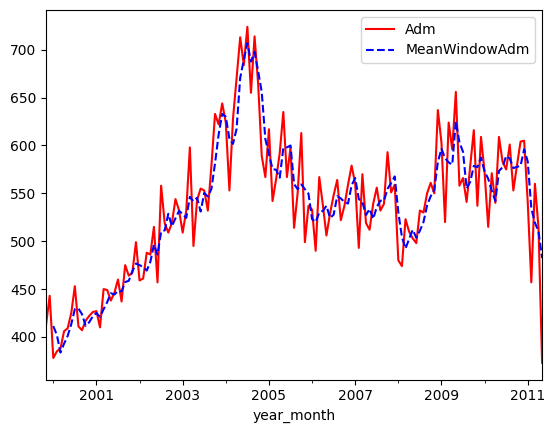

In [34]:
# We just need to plot now
df[['Adm', 'MeanWindowAdm']].plot(style = ['-r', '--b'])